In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3072)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)


(60000, 28, 28, 1)   (60000,)
(10000, 28, 28, 1)   (10000,)


In [2]:
# 2.简单的深度网络
# # 如AlexNet,VggNet

In [5]:
x_shape  = x_train.shape
deep_model = keras.Sequential(
[
    layers.Conv2D(input_shape=((x_shape[1], x_shape[2], x_shape[3])),
                 filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])


In [6]:
deep_model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
deep_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [7]:
history = deep_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)


W0711 07:39:55.160665 140445894665984 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 12s 220us/sample - loss: 0.2698 - accuracy: 0.9320 - val_loss: 0.0557 - val_accuracy: 0.9865
Epoch 2/5
54000/54000 [==============================] - 10s 189us/sample - loss: 0.0580 - accuracy: 0.9822 - val_loss: 0.0474 - val_accuracy: 0.9863
Epoch 3/5
54000/54000 [==============================] - 10s 191us/sample - loss: 0.0422 - accuracy: 0.9871 - val_loss: 0.0443 - val_accuracy: 0.9887
Epoch 4/5
54000/54000 [==============================] - 10s 188us/sample - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.0464 - val_accuracy: 0.9872
Epoch 5/5
54000/54000 [==============================] - 10s 190us/sample - loss: 0.0281 - accuracy: 0.9913 - val_loss: 0.0373 - val_accuracy: 0.9903


In [8]:
deep_model.evaluate(x_test, y_test)


10000/10000 [==============================] - 1s 128us/sample - loss: 0.0312 - accuracy: 0.9903


[0.031217987376531527, 0.9903]

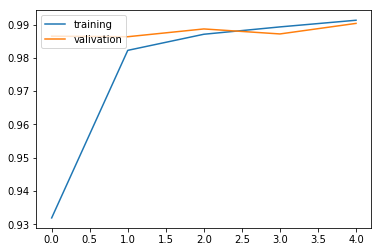

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()


In [11]:
result = deep_model.evaluate(x_test, y_test)


10000/10000 [==============================] - 1s 117us/sample - loss: 0.0312 - accuracy: 0.9903


In [12]:
# 3.添加了其它功能层的深度卷积

In [13]:
x_shape  = x_train.shape
deep_model = keras.Sequential(
[
    layers.Conv2D(input_shape=((x_shape[1], x_shape[2], x_shape[3])),
                 filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
    
])


In [14]:
deep_model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
deep_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)       

In [15]:
history = deep_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 17s 319us/sample - loss: 0.3133 - accuracy: 0.9013 - val_loss: 0.0604 - val_accuracy: 0.9820
Epoch 2/5
54000/54000 [==============================] - 15s 275us/sample - loss: 0.1226 - accuracy: 0.9629 - val_loss: 0.0428 - val_accuracy: 0.9867
Epoch 3/5
54000/54000 [==============================] - 15s 275us/sample - loss: 0.0868 - accuracy: 0.9734 - val_loss: 0.0354 - val_accuracy: 0.9908
Epoch 4/5
54000/54000 [==============================] - 15s 277us/sample - loss: 0.0661 - accuracy: 0.9803 - val_loss: 0.0411 - val_accuracy: 0.9895
Epoch 5/5
54000/54000 [==============================] - 15s 276us/sample - loss: 0.0567 - accuracy: 0.9823 - val_loss: 0.0374 - val_accuracy: 0.9908


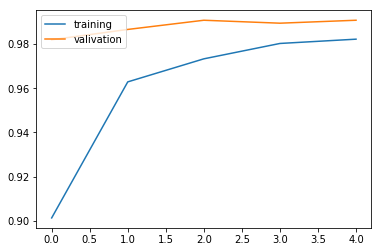

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()


In [17]:
result = deep_model.evaluate(x_test, y_test)


10000/10000 [==============================] - 2s 190us/sample - loss: 0.0310 - accuracy: 0.9909


In [18]:
# 4.NIN网络
# Min等人在 2013年（https://arxiv.org/abs/1312.4400）提出了减少模型中参数数量的方法之一
# 即“网络中的网络（NIN）”或“1X1卷积”
# 方法很简单 - 在其他卷积层之后添加卷积层
# 具有降低图像空间的维度（深度）的效果，有效地减少了参数的数量


In [19]:
# GoogleNet 中就用到了NIN结构

In [20]:
x_shape  = x_train.shape
deep_model = keras.Sequential(
[
    layers.Conv2D(input_shape=((x_shape[1], x_shape[2], x_shape[3])),
                 filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=16, kernel_size=(1,1), strides=(1,1), padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=16, kernel_size=(1,1), strides=(1,1), padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
    
])


In [21]:
deep_model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
deep_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 16)        528       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 32)       

In [22]:
history = deep_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 15s 272us/sample - loss: 0.3217 - accuracy: 0.8991 - val_loss: 0.0664 - val_accuracy: 0.9812
Epoch 2/5
54000/54000 [==============================] - 13s 239us/sample - loss: 0.0915 - accuracy: 0.9716 - val_loss: 0.0451 - val_accuracy: 0.9870
Epoch 3/5
54000/54000 [==============================] - 13s 235us/sample - loss: 0.0687 - accuracy: 0.9791 - val_loss: 0.0427 - val_accuracy: 0.9890
Epoch 4/5
54000/54000 [==============================] - 13s 235us/sample - loss: 0.0558 - accuracy: 0.9823 - val_loss: 0.0517 - val_accuracy: 0.9855
Epoch 5/5
54000/54000 [==============================] - 13s 233us/sample - loss: 0.0468 - accuracy: 0.9856 - val_loss: 0.0436 - val_accuracy: 0.9882


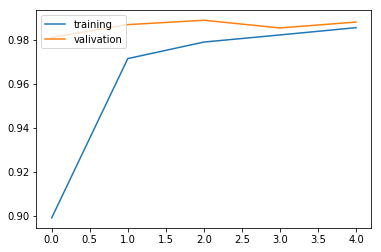

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()


In [24]:
result = deep_model.evaluate(x_test, y_test)


10000/10000 [==============================] - 2s 182us/sample - loss: 0.0448 - accuracy: 0.9867
